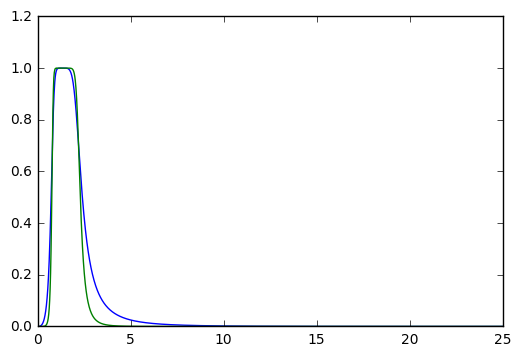

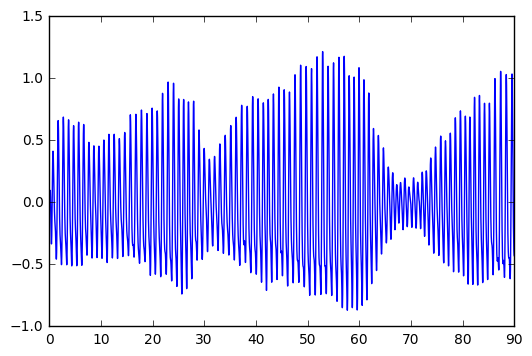

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.signal import firwin
from scipy.signal import freqz
from scipy.signal import find_peaks_cwt
from scipy.signal import butter, lfilter

%matplotlib inline
data = np.genfromtxt("takashin_Homework_sample.csv", dtype=float, delimiter=',', names=True)
timestamp = data['timesecond']
IR = preprocessing.scale(data['IR'])
RED = preprocessing.scale(data['RED'])


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

fs = 50.0
lowcut = 0.8
highcut = 2.2
# lowcut = 0.15 for resp
# highcut = 0.34

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
    
plt.figure()
y = butter_bandpass_filter(IR, lowcut, highcut, fs, order=3)
plt.plot(timestamp, y)

In [91]:
# def caculateHeartRate (data):
inputData = y
inputTime = timestamp
peakind = find_peaks_cwt(inputData, np.arange(5,10))
print "number of peak %d" % len(peakind)

def caculateHeartRate(timestamp, data, width, fs):
    peakind = find_peaks_cwt(inputData, width)
    numberOfPeak = len(peakind)
    print "number of peak %d" % numberOfPeak
    firstPeakTime = timestamp[peakind[0] - 1]
    lastPeakTime = timestamp[peakind[numberOfPeak - 1] - 1]
    timeInterval = lastPeakTime - firstPeakTime
    print "total timeInterval %f" % timeInterval
    averageDistance = timeInterval/(numberOfPeak - 1)
    print "average distance is %f" % averageDistance
    return 60 / averageDistance

print caculateHeartRate(inputTime, inputData,  np.arange(8,10), 50)

number of peak 85
number of peak 86
total timeInterval 88.800000
average distance is 1.044706
57.4324324324


([32], array([ 1.6]), array([ 0.9995736]))

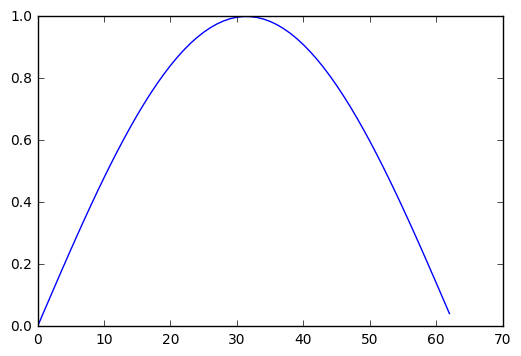

In [6]:
from scipy import signal
xs = np.arange(0, np.pi, 0.05)
data = np.sin(xs)
plt.plot(data)
peakind = signal.find_peaks_cwt(data, np.arange(1,10))
peakind, xs[peakind], data[peakind]

In [ ]:
def detect_peaks(dataset):
    window = []
    peaklist = []
    listpos = 0 
    for datapoint in dataset.hart:
        rollingmean = dataset.hart_rollingmean[listpos]
        if (datapoint < rollingmean) and (len(window) < 1):
            listpos += 1
        elif (datapoint > rollingmean):
            window.append(datapoint)
            listpos += 1
        else:
            maximum = max(window)
            beatposition = listpos - len(window) + (window.index(max(window)))
            peaklist.append(beatposition)
            window = []
            listpos += 1
    measures['peaklist'] = peaklist
    measures['ybeat'] = [dataset.hart[x] for x in peaklist]

array([2, 3, 4, 5, 6, 7, 8, 9])